In [32]:
import nltk

In [33]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string  
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier 
import matplotlib.pyplot as plt  
import seaborn as sns 
import plotly.express as px
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [34]:
df=pd.read_csv(r"C:\Users\reach\Downloads\healthcare_reviews (1).csv")

In [35]:
df.head()

,Review_Text,Rating
0,I have mixed feelings about my experience.,4
1,The staff was caring and attentive. I couldn't...,5
2,I have mixed feelings about my experience.,5
3,I have mixed feelings about my experience.,5
4,The healthcare provider was excellent. I had a...,3


In [36]:
# df['Sentiment'] = '0'
df.loc[df['Rating'] >3, 'Sentiment'] = '1'
df.loc[df['Rating'] ==3, 'Sentiment'] = '0'
df.loc[df['Rating'] <3, 'Sentiment'] = '-1'

In [37]:
df.head()

,Review_Text,Rating,Sentiment
0,I have mixed feelings about my experience.,4,1
1,The staff was caring and attentive. I couldn't...,5,1
2,I have mixed feelings about my experience.,5,1
3,I have mixed feelings about my experience.,5,1
4,The healthcare provider was excellent. I had a...,3,0


In [38]:
df.isnull().sum()

Review_Text    100
Rating           0
Sentiment        0
dtype: int64

In [39]:
df.shape

(1000, 3)

In [40]:
df=df.dropna()
df.shape

(900, 3)

In [41]:
# 1) Lowering of data
df['Review_Text']=df['Review_Text'].str.lower()

In [42]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [43]:
# 2) Tokenization of data
df['tokenized_reviews'] = df.apply(lambda row: nltk.word_tokenize(row['Review_Text']), axis=1)

In [44]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [45]:
# 3) Stop Words Removal in data
english_stopwords=stopwords.words('english')
custom_words_to_retain=['nor', 'not', "don't", 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

def remove_stop_words(words_list):
    return [t for t in words_list if t not in english_stopwords or t in custom_words_to_retain]

In [46]:
df['stopwords_removed']=df.apply(lambda row:remove_stop_words(row['tokenized_reviews']),axis=1)

In [47]:
# 4) Punctuations Removal in data
punctuations = string.punctuation
def remove_punct(words_list):
    return [t for t in words_list if t not in punctuations]

In [48]:
df['punct_removed']=df.apply(lambda row:remove_punct(row['stopwords_removed']),axis=1)

In [49]:
unknown=["'m","wo"]
def remove_unknown_words(words_list):
    return [t for t in words_list if t not in unknown]

In [50]:
df['punct_removed']=df.apply(lambda row:remove_unknown_words(row['punct_removed']),axis=1)

In [51]:
def find_and_replace(words_list):
    return [t.replace("n't",'not') for t in words_list]

In [52]:
df['punct_removed']=df.apply(lambda row:find_and_replace(row['punct_removed']),axis=1)

In [53]:
# 5) Lemmatization
lm=WordNetLemmatizer()
def lemmatize_list(words_list):
    return [lm.lemmatize(t) for t in words_list]

In [54]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\reach\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [55]:
df['lemmatized']=df.apply(lambda row:lemmatize_list(row['punct_removed']),axis=1)

In [56]:
def convert_to_string(words_list):
    return " ".join(words_list)

In [57]:
df['cleaned']=df.apply(lambda row:convert_to_string(row['lemmatized']),axis=1)

In [58]:
df.to_csv(r"C:\Users\reach\Downloads\data_cleaned.csv")

In [59]:
df.head()

,Review_Text,Rating,Sentiment,tokenized_reviews,stopwords_removed,punct_removed,lemmatized,cleaned
0,i have mixed feelings about my experience.,4,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
1,the staff was caring and attentive. i couldn't...,5,1,"[the, staff, was, caring, and, attentive, ., i...","[staff, caring, attentive, ., could, n't, happ...","[staff, caring, attentive, could, not, happier]","[staff, caring, attentive, could, not, happier]",staff caring attentive could not happier
2,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
3,i have mixed feelings about my experience.,5,1,"[i, have, mixed, feelings, about, my, experien...","[mixed, feelings, experience, .]","[mixed, feelings, experience]","[mixed, feeling, experience]",mixed feeling experience
4,the healthcare provider was excellent. i had a...,3,0,"[the, healthcare, provider, was, excellent, .,...","[healthcare, provider, excellent, ., great, ex...","[healthcare, provider, excellent, great, exper...","[healthcare, provider, excellent, great, exper...",healthcare provider excellent great experience


In [60]:
df['Sentiment'].value_counts()

Sentiment
1     388
-1    365
0     147
Name: count, dtype: int64

In [61]:
sentiment_counts = df['Sentiment'].value_counts()
fig = px.bar(sentiment_counts,height=400,width=700)
fig.update_layout(showlegend=False)
fig.show()

In [ ]:
dataset_analysis.to_csv(r"C:\Users\reach\Downloads\dataset_analysis1.csv",index=False)

In [ ]:
temp_df=dataset_analysis.query("Sentiment=='1'")

In [ ]:
positive_df=pd.DataFrame()
positive_df['Words']=list(temp_df.iloc[:, :-1].columns)
positive_df['Frequency']=temp_df.iloc[:, :-1].sum().values
positive_df = positive_df.sort_values(by='Frequency',ascending=False)
positive_df.to_csv(r'positive_df_1.csv',index=False)

In [ ]:
positive_df[positive_df['Words'].str.split().apply(len) > 1]


,Words,Frequency
32,healthcare provider,34
25,feeling experience,20
36,mixed feeling,20
44,not recommend,20
56,recommend provider,20
67,terrible would,20
23,experience terrible,20
69,would not,20
29,great experience,19
52,provider excellent,19


In [ ]:
temp_df=dataset_analysis.query("Sentiment=='-1'")
negative_df=pd.DataFrame()
negative_df['Words']=list(temp_df.iloc[:, :-1].columns)
negative_df['Frequency']=temp_df.iloc[:, :-1].sum().values
negative_df = negative_df.sort_values(by='Frequency',ascending=False)
negative_df.to_csv(r'negative_df_1.csv',index=False)
negative_df.head()

,Words,Frequency
0,attentive,0
44,not recommend,0
50,provider,0
49,possible,0
48,okay nothing,0


In [ ]:
negative_df[negative_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
44,not recommend,0
48,okay nothing,0
46,nothing exceptional,0
43,not happier,0
52,provider excellent,0
42,not coming,0
40,nor bad,0
38,neither good,0
51,provider avoid,0
1,attentive could,0


In [ ]:
temp_df=dataset_analysis.query("Sentiment=='0'")
neutral_df=pd.DataFrame()
neutral_df['Words']=list(temp_df.iloc[:, :-1].columns)
neutral_df['Frequency']=temp_df.iloc[:, :-1].sum().values
neutral_df = negative_df.sort_values(by='Frequency',ascending=False)
neutral_df.to_csv(r'neutral_df_1.csv',index=False)


In [ ]:
neutral_df[neutral_df['Words'].str.split().apply(len) > 1]

,Words,Frequency
8,bad experience,0
3,average experience,0
5,avoid possible,0
10,caring attentive,0
16,disappointing not,0
12,coming back,0
14,could not,0
44,not recommend,0
32,healthcare provider,0
29,great experience,0


In [66]:
from sklearn.model_selection import train_test_split

In [67]:
X=df['cleaned'].values
y=df['Sentiment'].values
X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.25,random_state=42)


In [68]:
#Count #Vectorizer :
cv = CountVectorizer(ngram_range=(1,2))

X_train_cv = cv.fit_transform(X_train)
X_test_cv = cv.transform(X_test)
y_train=y_train.astype(int)
y_test=y_test.astype(int)


In [69]:
y_train=y_train.astype(int)
y_test=y_test.astype(int)


In [70]:
print("y_train, counts of label '1': {}".format(np.count_nonzero(y_train == 1))) 
print("y_train, counts of label '-1': {}".format(np.count_nonzero(y_train == -1))) 
print("y_train, counts of label '0': {}".format(np.count_nonzero(y_train == 0))) 

y_train, counts of label '1': 290
y_train, counts of label '-1': 269
y_train, counts of label '0': 116


In [71]:
print("y_test, counts of label '1': {}".format(np.count_nonzero(y_test == 1))) 
print("y_test, counts of label '-1': {}".format(np.count_nonzero(y_test == -1))) 
print("y_test, counts of label '0': {}".format(np.count_nonzero(y_test == 0))) 

y_test, counts of label '1': 98
y_test, counts of label '-1': 96
y_test, counts of label '0': 31


knn classifier

In [72]:
# Choosing the value of K
K = [] 
training = [] 
test = [] 
scores = {} 
  
for k in range(2, 21): 
    clf = KNeighborsClassifier(n_neighbors = k) 
    clf.fit(X_train_cv, y_train) 
  
    training_score = clf.score(X_train_cv, y_train) 
    test_score = clf.score(X_test_cv, y_test) 
    K.append(k) 
  
    training.append(training_score) 
    test.append(test_score) 
    scores[k] = [training_score, test_score] 

In [74]:
# Optimal K value is 11
knnclf = KNeighborsClassifier(n_neighbors = 15) 
knnclf.fit(X_train_cv, y_train)

KNeighborsClassifier(n_neighbors=15)

In [75]:
y_pred=knnclf.predict(X_test_cv)

In [76]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[36  0 60]
 [ 5  0 26]
 [36  0 62]]
0.43555555555555553


<Axes: >

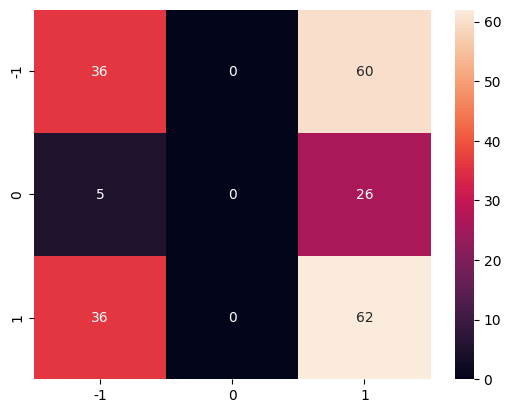

In [77]:
categories = ["-1", "0","1"]
sns.heatmap(cm, annot=True, xticklabels=categories, yticklabels=categories)

In [78]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          -1       0.47      0.38      0.42        96
           0       0.00      0.00      0.00        31
           1       0.42      0.63      0.50        98

    accuracy                           0.44       225
   macro avg       0.30      0.34      0.31       225
weighted avg       0.38      0.44      0.40       225



c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
#RANDOM FOREST CLASSIFIER

In [ ]:
random_forest_classifier=RandomForestClassifier(n_estimators=100)
random_forest_classifier.fit(X_train_cv,y_train)

RandomForestClassifier()

In [ ]:
cm=confusion_matrix(y_test,y_pred)
print(cm)
print(accuracy_score(y_test,y_pred))

[[36  0 60]
 [ 5  0 26]
 [36  0 62]]
0.43555555555555553


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.47      0.38      0.42        96
           0       0.00      0.00      0.00        31
           1       0.42      0.63      0.50        98

    accuracy                           0.44       225
   macro avg       0.30      0.34      0.31       225
weighted avg       0.38      0.44      0.40       225



c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report




clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_cv, y_train)

y_pred = clf.predict(X_test_cv)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.44      0.44        96
           0       0.00      0.00      0.00        31
           1       0.41      0.54      0.46        98

    accuracy                           0.42       225
   macro avg       0.28      0.33      0.30       225
weighted avg       0.37      0.42      0.39       225



c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [80]:
#HYPERPARAMETER TUNING

from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]  # Method for sampling data points (with or without replacement)
}

# Create a base model
rf = RandomForestClassifier(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_test_cv, y_test)

# Print the best parameters
print(grid_search.best_params_)


Fitting 3 folds for each of 216 candidates, totalling 648 fits
{'bootstrap': True, 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}


In [82]:

#HYPERPARAMETER TUNING
clf = RandomForestClassifier(
    n_estimators=50,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    bootstrap=True,
    random_state=42
)


clf.fit(X_train_cv, y_train)
y_pred = clf.predict(X_test_cv)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.47      0.38      0.42        96
           0       0.00      0.00      0.00        31
           1       0.42      0.63      0.50        98

    accuracy                           0.44       225
   macro avg       0.30      0.34      0.31       225
weighted avg       0.38      0.44      0.40       225



c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [83]:
from sklearn.ensemble import GradientBoostingClassifier

# Create a Gradient Boosting Classifier
gb = GradientBoostingClassifier(random_state=42)

# Train the model using the SMOTE-resampled data
gb.fit(X_train_cv, y_train)

# Make predictions
y_pred = gb.predict(X_test_cv)

# Print the classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.44      0.44      0.44        96
           0       0.00      0.00      0.00        31
           1       0.41      0.54      0.46        98

    accuracy                           0.42       225
   macro avg       0.28      0.33      0.30       225
weighted avg       0.37      0.42      0.39       225



c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

c:\Users\reach\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

